# EFFECTS OF METAL OXIDES IN POSITANO'S TEMPERATURE 

***Author:*** Ariadna Recasens


## 1. OVERVIEW
This project explores the effect of metal oxides on the temperature of Positano to help the new mayor implement novel regulations. 


## 2. BUSINESS PROBLEM
The new mayor of Positano, a small Italian city, is worried about climate change and wants to understand whether metal oxides that are released from the city's industries impact the city's warming climate to introduce new regulations.

In this project, we will create a linear regression model to understand the effect of ten metal oxides on Positano's temperature to help the new mayor introduce new regulations to reduce climate change. 


## 3. DATA UNDERSTANDING
This project explores an [Air Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Air+Quality) containing 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. 

The device was located on the field in a significantly polluted area, at road level, within an Italian city. 

Data were recorded from March 2004 to February 2005 (one year), representing the longest freely available recordings of on field-deployed air quality chemical sensor device responses. 

Missing values are tagged with -200 value.


## 4. METHODS 
1. Data exploration: How do variables change over time?
1. Data exploration: how did the average of each variables change between 2014 and 2015?
1. Linear regression model: Iteration process to imporve the model by studying multicolinearity and interactions. The model has been validate using train and testing subset.

## 5. DATA MANIPULATIONS

### Importing necessary libraries

In [1]:
#data cleaning and stats
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#normality check
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf


#linear regression (sklearn and statsmodels)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import cross_val_score



#### Let's open the data file

In [2]:

data = pd.read_csv('./data/AirQualityUCI.csv', delimiter=';')


## Data Understanding

Let's start exploring our data

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


We are going to rename the columns to make it easier to manipulate the data

In [5]:
data.columns=data.columns.str.replace('[(,),.]','')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9357 non-null   object 
 1   Time         9357 non-null   object 
 2   COGT         9357 non-null   object 
 3   PT08S1CO     9357 non-null   float64
 4   NMHCGT       9357 non-null   float64
 5   C6H6GT       9357 non-null   object 
 6   PT08S2NMHC   9357 non-null   float64
 7   NOxGT        9357 non-null   float64
 8   PT08S3NOx    9357 non-null   float64
 9   NO2GT        9357 non-null   float64
 10  PT08S4NO2    9357 non-null   float64
 11  PT08S5O3     9357 non-null   float64
 12  T            9357 non-null   object 
 13  RH           9357 non-null   object 
 14  AH           9357 non-null   object 
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


Let's eliminate the columns that are not essential for our analysis.


In [7]:
data = data.drop(['Unnamed: 15'], axis=1)
data = data.drop(['Unnamed: 16'], axis=1)
data = data.drop(['Time'], axis=1)


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9357 non-null   object 
 1   COGT        9357 non-null   object 
 2   PT08S1CO    9357 non-null   float64
 3   NMHCGT      9357 non-null   float64
 4   C6H6GT      9357 non-null   object 
 5   PT08S2NMHC  9357 non-null   float64
 6   NOxGT       9357 non-null   float64
 7   PT08S3NOx   9357 non-null   float64
 8   NO2GT       9357 non-null   float64
 9   PT08S4NO2   9357 non-null   float64
 10  PT08S5O3    9357 non-null   float64
 11  T           9357 non-null   object 
 12  RH          9357 non-null   object 
 13  AH          9357 non-null   object 
dtypes: float64(8), object(6)
memory usage: 1.0+ MB


Now let's explore NaN values

In [8]:
#inspect for any columns with null values
data.isna().sum()

Date          114
COGT          114
PT08S1CO      114
NMHCGT        114
C6H6GT        114
PT08S2NMHC    114
NOxGT         114
PT08S3NOx     114
NO2GT         114
PT08S4NO2     114
PT08S5O3      114
T             114
RH            114
AH            114
dtype: int64

Let's deal with NaN data. From the data above, we know that there are 114 rows with NaN values. Since this correspond to a small percentage, we proceed to delete the rows that contain Nan values.

In [9]:
data = data.dropna()

As mentioned in the Dataset information, the missing values are tagged with -200 values. Let's explore that a bit further:

In [10]:
data['COGT'].value_counts()

-200    1592
1,4      279
1,6      275
1,5      273
1,1      262
        ... 
9,9        1
8,5        1
9,4        1
7,6        1
9,2        1
Name: COGT, Length: 104, dtype: int64

In [11]:
data['T'].value_counts()

-200    366
20,8     57
21,3     54
20,2     51
13,8     51
       ... 
41,0      1
36,7      1
40,7      1
-1,2      1
43,4      1
Name: T, Length: 437, dtype: int64

In [12]:
#data['CO(GT)'].tail()
data.sort_values('COGT').head()


,Date,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
3501,03/08/2004,-200,1076.0,-200.0,"9,3",951.0,112.0,730.0,109.0,1675.0,704.0,"36,5","28,7","1,7256"
3301,26/07/2004,-200,1150.0,-200.0,"11,2",1020.0,180.0,686.0,116.0,1842.0,1169.0,"26,5","46,3","1,5768"
3302,26/07/2004,-200,1088.0,-200.0,"9,7",965.0,168.0,734.0,109.0,1744.0,1049.0,"27,9","42,7","1,5754"
3303,26/07/2004,-200,993.0,-200.0,"7,2",866.0,111.0,832.0,98.0,1637.0,823.0,"28,8","38,9","1,5184"
3304,26/07/2004,-200,962.0,-200.0,"6,8",849.0,111.0,861.0,97.0,1559.0,804.0,"31,7","31,5","1,4487"


To deal with these missing. values, we will replace them for the median of the columns.

In [13]:
for i in data.columns:
    if i == 'Date':
        continue
    else :
        data[i] = data[i].astype(str)
        data[i] = data[i].str.replace(",",".")
        data[i] = data[i].astype(str).astype(float)
        data[i] = data[i].replace(-200,data[i].median())

Let's confirm that it has worked: 


In [14]:
data['T'].value_counts()

 17.2    390
 20.8     57
 21.3     54
 13.8     51
 20.2     51
        ... 
 0.5       1
-0.2       1
 40.9      1
-0.3       1
 40.7      1
Name: T, Length: 436, dtype: int64

In [15]:
data['COGT'].value_counts()

1.5     1956
1.0      305
1.4      279
1.6      275
1.1      262
        ... 
7.6        1
9.3        1
9.5        1
10.1       1
11.9       1
Name: COGT, Length: 96, dtype: int64

In [16]:
data['NMHCGT'].value_counts() #When we look at NHMCGT, we can see that -200 is still there. Why? See next

-200.0    8443
 66.0       14
 40.0        9
 29.0        9
 93.0        8
          ... 
 131.0       1
 102.0       1
 383.0       1
 228.0       1
 541.0       1
Name: NMHCGT, Length: 430, dtype: int64

In [17]:
data['NMHCGT'].median() #Because -200 is the median of the group. From the graphs below, we can see that NMHCGT 
                        #was recorded only for a few period of time, that's why we will delete this column shorlty.

-200.0

Let's further explore the data with some plots. Let's see how the CO2 and T change over time:

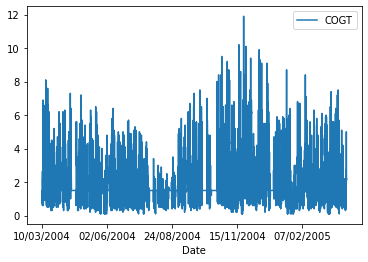

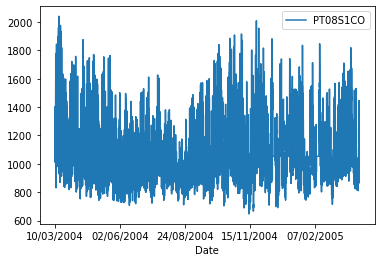

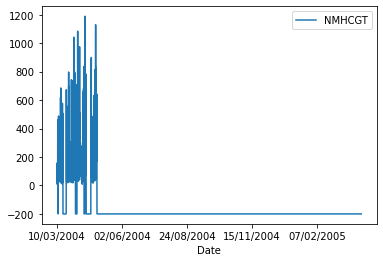

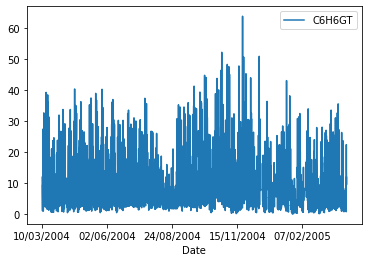

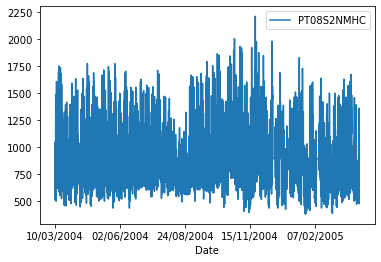

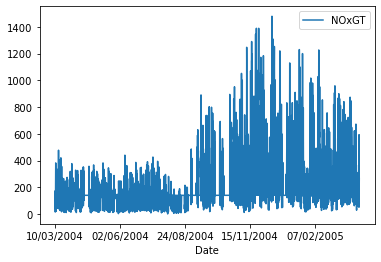

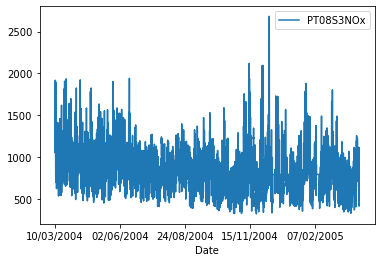

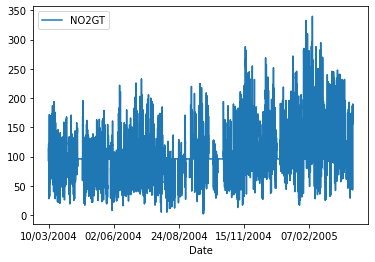

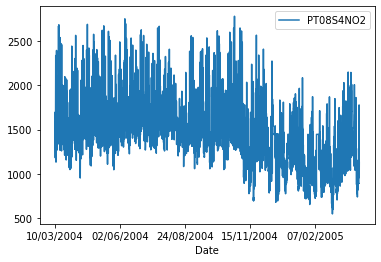

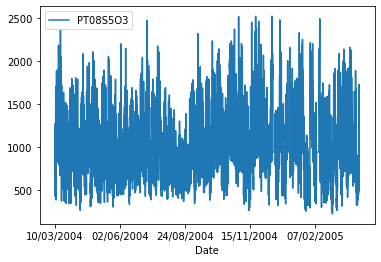

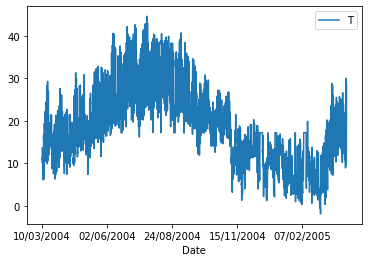

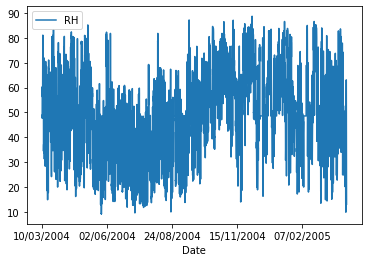

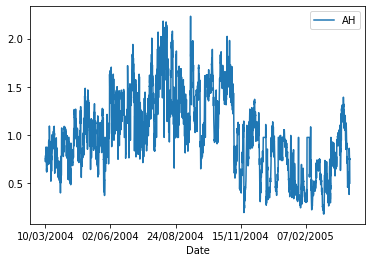

In [18]:


for i in data.columns:
    if i == 'Date':
        continue
    else :
        data.plot(x="Date", y=i)
        #plt.savefig('./images/hello.png', bbox_inches = "tight")
        plt.savefig('./images/'+str(i)+".png",dpi=300)
        plt.show



In [19]:
data = data.drop('NMHCGT', axis=1) #as discussed above, we delete this column. because this oxide metal 
                                    #was present only during a short period of time

Let's further explore how the variables change with time

In [20]:

data.groupby(pd.PeriodIndex(data['Date'], freq="M"))['T'].mean()


Date
2004-01    22.041204
2004-02    23.225926
2004-03    17.661756
2004-04    19.131790
2004-05    21.973363
2004-06    24.778858
2004-07    27.205357
2004-08    25.419345
2004-09    22.162037
2004-10    19.988938
2004-11    14.775000
2004-12    13.531034
2005-01     7.090217
2005-02     7.464375
2005-03    15.800906
2005-04    11.711494
2005-05     8.447222
2005-06     9.166667
2005-07     7.565278
2005-08     9.711111
2005-09    13.661111
2005-10    13.929167
2005-11    13.380556
2005-12    11.122222
Freq: M, Name: T, dtype: float64

In [21]:
data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['T'].mean()


Date
2004    20.744065
2005    10.458611
Freq: A-DEC, Name: T, dtype: float64

To furhter explore the data, let's see how the mean of each of the variables change after 1 year. Are they increaseing?

In [22]:
a = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['COGT'].mean()
b = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S1CO'].mean()
c = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['C6H6GT'].mean()
d = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S2NMHC'].mean()
e = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['NOxGT'].mean()
f = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S3NOx'].mean()
g = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['NO2GT'].mean()
h = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S4NO2'].mean()
i = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S5O3'].mean()
j = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['T'].mean()
k = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['RH'].mean()
l = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['AH'].mean()


In [23]:
columns = ['variable','average_2014','average_2015']

variables = pd.DataFrame(columns=columns)
def add_values(num_role, variable, dataset):
    variables.loc[num_role] = [variable, dataset[0], dataset[1]]

add_values(1, 'COGT', a)
add_values(2, 'PT08S1CO', b)
add_values(3, 'C6H6GT', c)
add_values(4, 'PT08S2NMHC', d)
add_values(5, 'NOxGT', e)
add_values(6, 'PT08S3NOx', f)
add_values(7, 'NO2GT', g)
add_values(8, 'PT08S4NO2', h)
add_values(9, 'PT08S5O3', i)
add_values(10, 'T', j)
add_values(11, 'RH', k)
add_values(12, 'AH', l)

variables

,variable,average_2014,average_2015
1,COGT,2.036723,2.030975
2,PT08S1CO,1095.316034,1106.497997
3,C6H6GT,10.543615,8.270360
4,PT08S2NMHC,958.720534,870.046729
5,NOxGT,201.584388,313.032043
6,PT08S3NOx,854.329677,769.133511
7,NO2GT,100.438959,140.636404
8,PT08S4NO2,1548.442475,1162.921673
9,PT08S5O3,1010.606610,1048.646195
10,T,20.744065,10.458611


In [24]:
#Now we can eliminate the DAte variable, as it is not of our interst in the following analysis". 
#We also delete Relative Humidty and Absolute Humidy, as they are not metal oxides

data = data.drop('Date', axis=1)
data = data.drop('RH', axis=1)
data = data.drop('AH', axis=1)




## Data Modelling

Let's take a look of distributions of selected predictors after preliminary data preparation. 


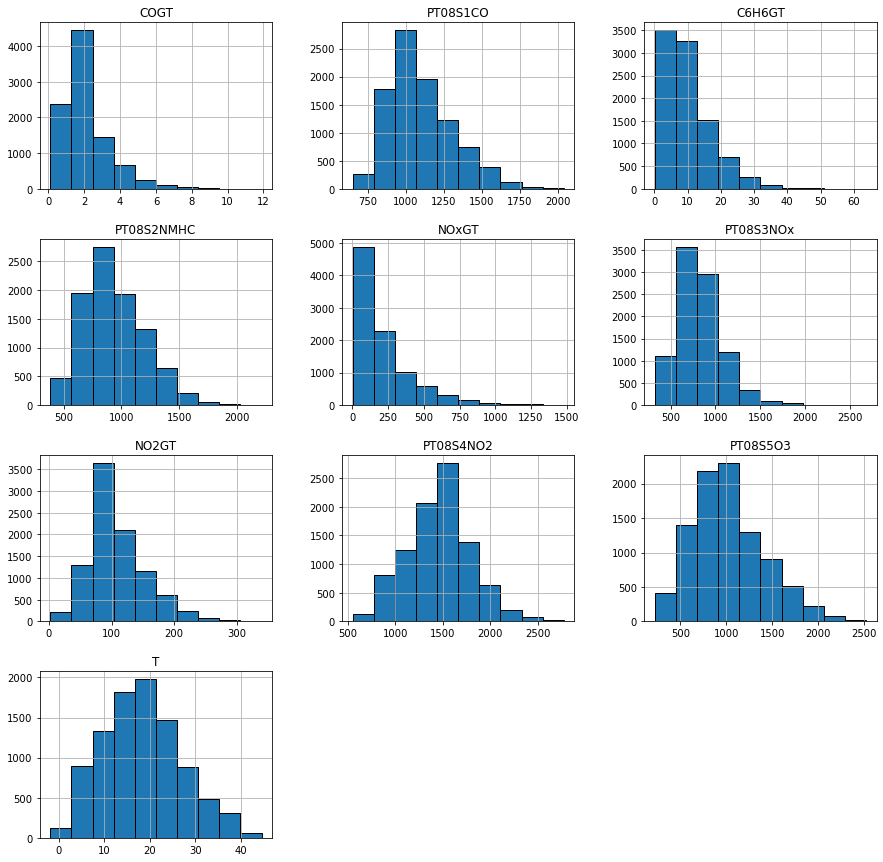

In [25]:
data.hist(figsize=(15,15), edgecolor = 'black');


From the graphs above, we can see that most of the variables display a normal distribution. But let's play a bit, and see if we can improve them with a logarithmic and normalization transformation.
Since we can't do the logarithm of negative values, let's first see which variables have negative values:


In [26]:
for i in data.columns:
    if i == 'Date':
        continue
    if data[i].min() <= 0:
        print(i) 
        
#data['T'].min() --> so we can't take 

T


Based on the above result, we will transform all variables but T

In [27]:
# log features
continuous = ['COGT','PT08S1CO','C6H6GT','PT08S2NMHC','NOxGT','PT08S3NOx','NO2GT','PT08S4NO2','PT08S5O3']

# Log transform and normalize
data_cont = data[continuous]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)


data_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COGT_log        9357 non-null   float64
 1   PT08S1CO_log    9357 non-null   float64
 2   C6H6GT_log      9357 non-null   float64
 3   PT08S2NMHC_log  9357 non-null   float64
 4   NOxGT_log       9357 non-null   float64
 5   PT08S3NOx_log   9357 non-null   float64
 6   NO2GT_log       9357 non-null   float64
 7   PT08S4NO2_log   9357 non-null   float64
 8   PT08S5O3_log    9357 non-null   float64
dtypes: float64(9)
memory usage: 731.0 KB


Let's see if the distribution improves after the transmoration (log + norm). From the graphs below, we obseve that doing this transfmoration signicantly worsen the normal distribtuion. AS such, we won't apply logarithm transformation to our dataset.

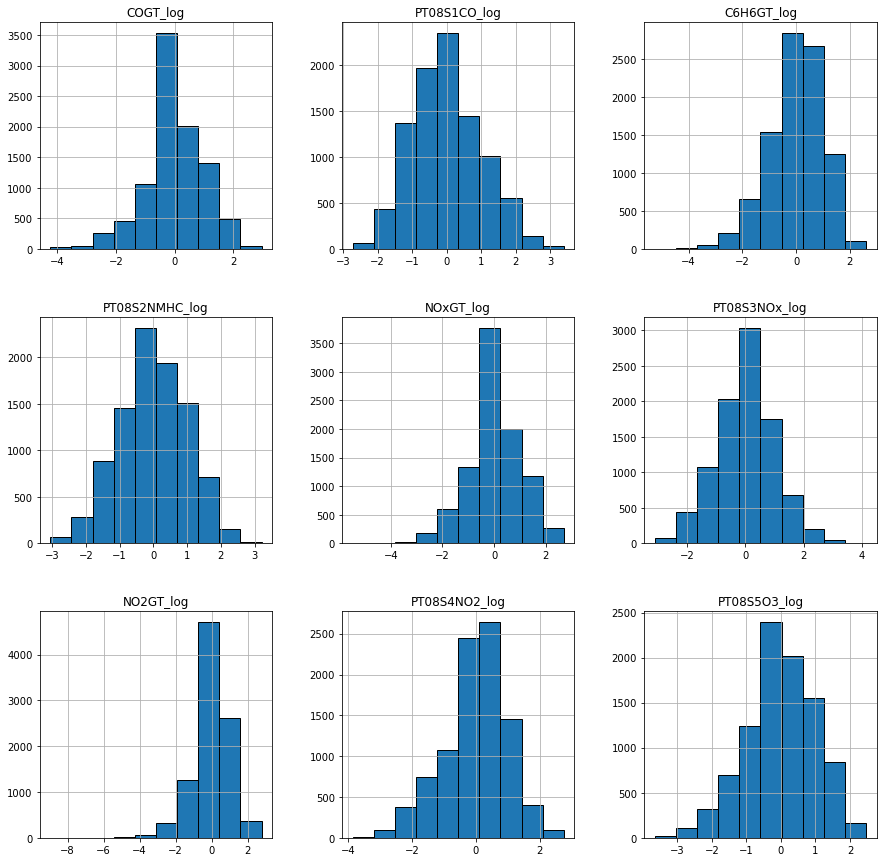

In [28]:
data_log_norm.hist(figsize=(15,15), edgecolor = 'black');


But let's see what happens if we normalize the data, without the logaritmic transformation. We can see from the graphs below that the distribution remains pretty normal, so we will use both the raw data and normalized data for furhter analysis and compare which one works better  

In [29]:
data2 = pd.concat([data['T'], data_log_norm], axis=1)


### Correlation visualization

Let's have a quick look to how variables correlate among each others. From the heatmap below, we can see that 5 variables are positively correlated with Temperature, and 7 negatively correlated with T.

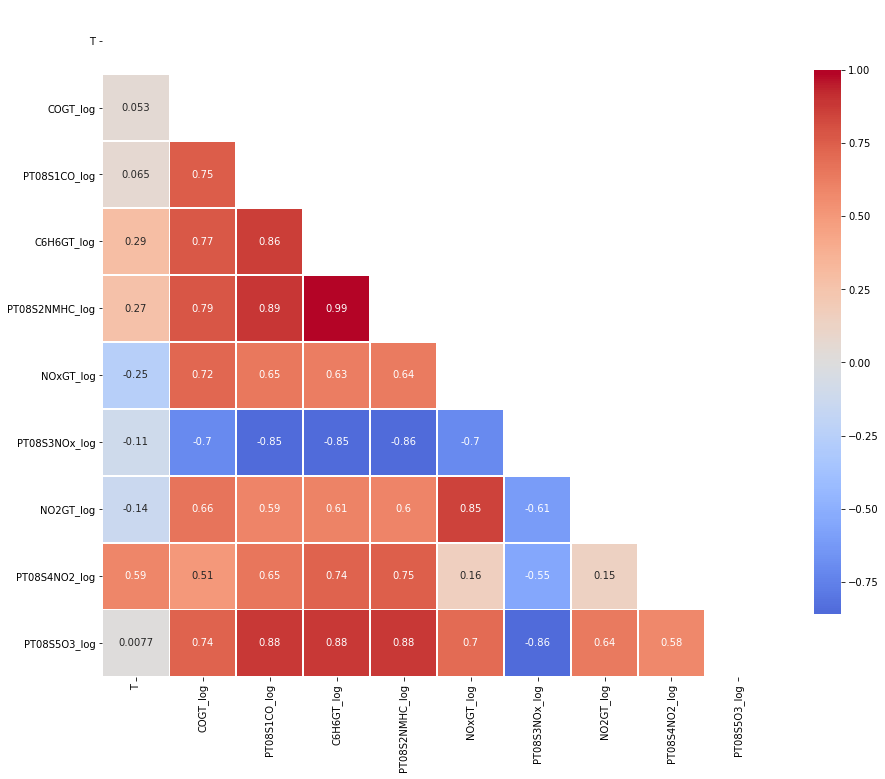

In [30]:
#visualize correlation using heatmap
corr = data2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

heatmap = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
fig = heatmap.get_figure()
fig.savefig("./images/heatmap.png") 

Let's do a first model using the raw data, and the normalized data.

#### Model with normalized data
The R-squared value of our model is 0.653, which means that 65,3% of the variablity in T can be explained by this model. 
5 variables significantly (p <0.05) and negatively (coef < 0) contribute to T, while 4 signifcnatly (p<0.05) and positviely (coef >0) contribute to Temperature. 
CO doesn't signfinicantly impact on T. 


In [31]:

X2 = data2.drop('T', axis=1)
y2 = data2['T']

import statsmodels.api as sm
X2_int = sm.add_constant(X2)
model = sm.OLS(y2,X2_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1958.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:38:34   Log-Likelihood:                -28519.
No. Observations:                9357   AIC:                         5.706e+04
Df Residuals:                    9347   BIC:                         5.713e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.2741      0.053    346.531      0.000      18.171      18.377
COGT_log          -0.4094      0.099     -4.123      0.000      -0.604      -0.215
PT08S1CO_log      -4.5977      0.141    -32.533      0.000      -4.875      -4.321
C6H6GT_log         4.6300      0.407     11.362      0.000       3.831       5.429
PT08S2NMHC_log     0.3421      0.440      0.778      0.437      -0.520       1.204
NOxGT_log         -3.1588      0.128    -24.677      0.000      -3.410      -2.908
PT08S3NOx_log     -2.8454      0.123    -23.181      0.000      -3.086      -2.605
NO2GT_log          2.1601      0.107     20.100      0.000       1.949       2.371
PT08S4NO2_log      6.3839      0.104     61.144      0.000       6.179       6.589
PT08S5O3_log      -5.2774      0.139    -38.064      0.000      -5.549      -5.006
==============================================================================
Omnibus:                      199.506   Durbin-Watson:                   0.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.402
Skew:                           0.297   Prob(JB):                     3.80e-53
Kurtosis:                       3.516   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

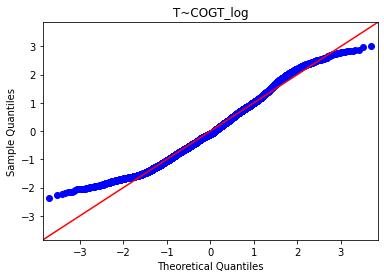

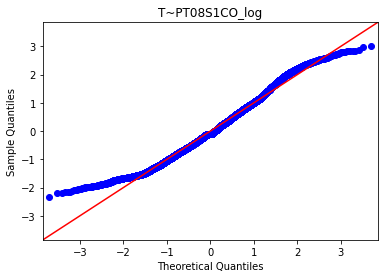

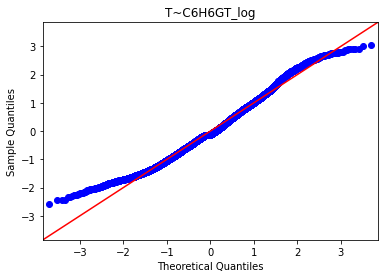

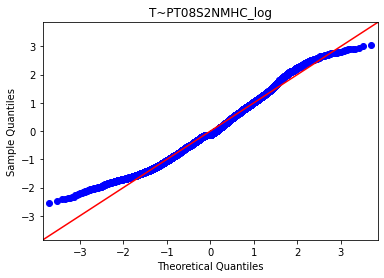

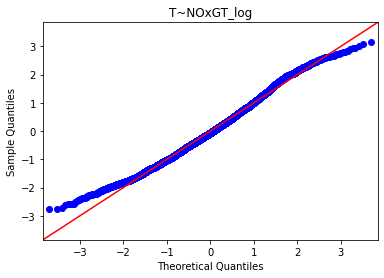

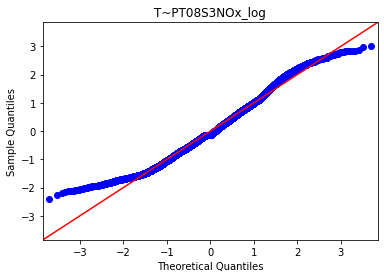

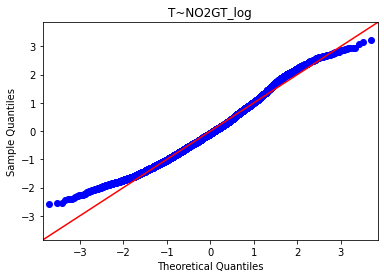

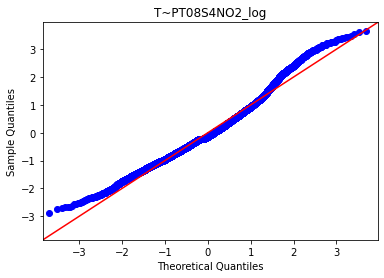

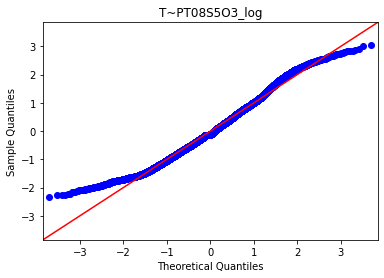

In [32]:
#Here we use QQ-plots to furhter confirm that our data follows a normal distribution. 

f_names = ['T~COGT_log', 'T~PT08S1CO_log', 'T~C6H6GT_log', 'T~PT08S2NMHC_log', 'T~NOxGT_log','T~PT08S3NOx_log','T~NO2GT_log','T~PT08S4NO2_log','T~PT08S5O3_log']

import warnings
warnings.filterwarnings('ignore')

for i in f_names:
    model = smf.ols(formula=i, data=data2).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(i)
    fig.show();

To see if we can improve our model, we next explore multicolinearity in our model. 

In [33]:
data2.corr()
abs(data2.corr()) > 0.8

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data2.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.8) & (df.cc <1)]

,cc
pairs,
"(PT08S2NMHC_log, C6H6GT_log)",0.990062
"(PT08S1CO_log, PT08S2NMHC_log)",0.886688
"(PT08S2NMHC_log, PT08S5O3_log)",0.879353
"(PT08S1CO_log, PT08S5O3_log)",0.879171
"(PT08S5O3_log, C6H6GT_log)",0.876932
"(PT08S1CO_log, C6H6GT_log)",0.863212
"(PT08S5O3_log, PT08S3NOx_log)",0.858976
"(PT08S3NOx_log, PT08S2NMHC_log)",0.857161
"(NO2GT_log, NOxGT_log)",0.851433


We explore the effect of deleting the variables that display a higher multicolinearity:

In [34]:
data3 = data2.drop(['PT08S2NMHC_log'], axis=1)
data3 = data2.drop(['PT08S5O3_log'], axis=1)
data3 = data2.drop(['PT08S1CO_log'], axis=1)
data3 = data2.drop(['C6H6GT_log'], axis=1)



In [35]:
#data = data.drop('Date', axis=1)

X2 = data3.drop('T', axis=1)
y2 = data3['T']

import statsmodels.api as sm
X2_int = sm.add_constant(X2)
model = sm.OLS(y2,X2_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2157.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:38:35   Log-Likelihood:                -28583.
No. Observations:                9357   AIC:                         5.718e+04
Df Residuals:                    9348   BIC:                         5.725e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.2741      0.053    344.181      0.000      18.170      18.378
COGT_log          -0.4470      0.100     -4.474      0.000      -0.643      -0.251
PT08S1CO_log      -5.0946      0.135    -37.652      0.000      -5.360      -4.829
PT08S2NMHC_log     4.9186      0.178     27.679      0.000       4.570       5.267
NOxGT_log         -3.3776      0.127    -26.509      0.000      -3.627      -3.128
PT08S3NOx_log     -2.9387      0.123    -23.833      0.000      -3.180      -2.697
NO2GT_log          2.4486      0.105     23.289      0.000       2.243       2.655
PT08S4NO2_log      6.4739      0.105     61.764      0.000       6.268       6.679
PT08S5O3_log      -4.9396      0.136    -36.229      0.000      -5.207      -4.672
==============================================================================
Omnibus:                      192.225   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.958
Skew:                           0.283   Prob(JB):                     3.51e-52
Kurtosis:                       3.535   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that after deleting the variables with higher correlation we don't improve the model. In fact, we reduce R2 slightly. As such, we proceed without deleting any variables, so we can draw conclusions for more variables.

### Model Validation

Now let's validate our test using test and train substets:

In [36]:
from sklearn.model_selection import train_test_split

X = data2.drop('T', axis=1)
y = data2['T']

# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

27.208326941582722

In [39]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_20_results = cross_val_score(linreg, X, y, cv=20, scoring=mse)

cv_5_results.mean(), cv_10_results.mean(), cv_20_results.mean()

(40.13310010355586, 31.302690485678635, 28.81475852580588)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

7485 1872 7485 1872
Train Mean Squarred Error: 26.251451705550608
Test Mean Squarred Error: 25.008467015727927


From the data above, we can see that the model works pretty similar using Train and test data, which validates our model. 

### Interactions
Now let's try to improve our model studying interaction between variables:


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.6514483867686971

In [42]:
from itertools import combinations

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
Top interactions: [('PT08S2NMHC_log', 'PT08S3NOx_log', 0.664), ('C6H6GT_log', 'PT08S3NOx_log', 0.661), ('C6H6GT_log', 'PT08S2NMHC_log', 0.659)]


Let's re-do our model introducing these interactions:

In [43]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact['PT08S2NMHC_PT08S3NOx'] = X['PT08S2NMHC_log'] * X['PT08S3NOx_log']
X_interact['C6H6GT_PT08S3NOx'] = X['C6H6GT_log'] * X['PT08S3NOx_log']
X_interact['C6H6GT_PT08S2NMHC'] = X['C6H6GT_log'] * X['PT08S2NMHC_log']

interact = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
interact

0.666425007536489

If we run a new model using this interaction-dataset, we see that we improve the R-squared a little bit, being now 0.668, meaning that 66.8% of variability in T can be explained with our model.  

In [44]:

import statsmodels.api as sm
X_int2 = sm.add_constant(X_interact)
model = sm.OLS(y,X_int2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1569.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:38:40   Log-Likelihood:                -28314.
No. Observations:                9357   AIC:                         5.665e+04
Df Residuals:                    9344   BIC:                         5.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   18.1413      0.401     45.254      0.000      17.356      18.927
COGT_log                -0.5616      0.098     -5.750      0.000      -0.753      -0.370
PT08S1CO_log            -4.5010      0.139    -32.483      0.000      -4.773      -4.229
C6H6GT_log              11.0968      4.513      2.459      0.014       2.250      19.944
PT08S2NMHC_log          -5.6786      4.271     -1.330      0.184     -14.051       2.693
NOxGT_log               -2.7477      0.127    -21.581      0.000      -2.997      -2.498
PT08S3NOx_log           -3.1564      0.121    -26.029      0.000      -3.394      -2.919
NO2GT_log                1.9257      0.106     18.103      0.000       1.717       2.134
PT08S4NO2_log            6.6732      0.103     64.636      0.000       6.471       6.876
PT08S5O3_log            -5.4497      0.136    -40.045      0.000      -5.716      -5.183
PT08S2NMHC_PT08S3NOx     4.8633      0.614      7.925      0.000       3.660       6.066
C6H6GT_PT08S3NOx        -3.7818      0.630     -6.003      0.000      -5.017      -2.547
C6H6GT_PT08S2NMHC        1.1018      0.408      2.700      0.007       0.302       1.902
==============================================================================
Omnibus:                      221.376   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.653
Skew:                           0.307   Prob(JB):                     8.43e-61
Kurtosis:                       3.576   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Further validation of the new interact model

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_interact, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

7485 1872 7485 1872
Train Mean Squarred Error: 25.151617069209955
Test Mean Squarred Error: 23.83571790530631


From the data above, we can conclude that our model works pretty well in both train and test substets.

Now let's see what are the variables that positively contribute to T, and which ones negatively contribute to T in our model: 

In [46]:
columns = ['index','coef']

coef_positive_table = pd.DataFrame(columns=columns)
coef_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model.params[:-3]): # I add [:-3] because I am removing the 3 columns with interactions
    if a > 0:
        coef_positive_table.loc[i] = [i,a]
    else:
        coef_negative_table.loc[i] = [i,a]

coef_positive_table     

,index,coef
0,0.0,18.141319
3,3.0,11.096846
7,7.0,1.925704
8,8.0,6.673217


In [47]:
coef_positive_table = coef_positive_table.iloc[1: , :]
coef_positive_table

,index,coef
3,3.0,11.096846
7,7.0,1.925704
8,8.0,6.673217


In [48]:
index_positive = coef_positive_table.index


#grade_analysis #data2?

positive_variables = []

for i in index_positive:
    positive_variables.append(data2.columns[i])

positive_variables

['C6H6GT_log', 'NO2GT_log', 'PT08S4NO2_log']

In [49]:
coef_positive_table['name_variable'] = positive_variables
coef_positive_table

,index,coef,name_variable
3,3.0,11.096846,C6H6GT_log
7,7.0,1.925704,NO2GT_log
8,8.0,6.673217,PT08S4NO2_log


In [50]:
index_negative = coef_negative_table.index


#grade_analysis #data2?
negative_variables = []

for i in index_negative:
    negative_variables.append(data2.columns[i])

negative_variables

['COGT_log',
 'PT08S1CO_log',
 'PT08S2NMHC_log',
 'NOxGT_log',
 'PT08S3NOx_log',
 'PT08S5O3_log']

In [51]:
coef_negative_table['name_variable'] = negative_variables
coef_negative_table

,index,coef,name_variable
1,1.0,-0.561600,COGT_log
2,2.0,-4.501010,PT08S1CO_log
4,4.0,-5.678621,PT08S2NMHC_log
5,5.0,-2.747710,NOxGT_log
6,6.0,-3.156382,PT08S3NOx_log
9,9.0,-5.449668,PT08S5O3_log


## 6. CONCLUSIONS
* All the metal oxides studied in this model significantly affect T in Positano.
* Benzene,  NO2 and tungsten oxide (nominally NO2 targeted) positively contribute to T raise (the more concentration of these oxides, the more Temperature), being Benzene the one with the highest positive impact. 
* CO, tin oxide, Titania (PT08.S2), NOx(GT), indium oxide, and tungsten oxide (nominally 03 targeted) negatively contribute to T (the more concentration of these oxides, the less T), being Titania the one with the highest negative impact. 


## 7. BUSINESS RECOMMENDATIONS
We observe a big drop in Temperature between 2014 and 2015, with the T average in 2014 of 20.2 C vs 9.4 C in 2015. This 10C difference could be an indicator that the T sensor was damaged. We recommend checking the Temperature Sensor and repeating the study with newly collected data.

Investigate why the levels of NOx almost double in 2015.

In terms of regulation, since Benzene is the one that contributes the most to Temperature increase, we recommend that the new regulations aim to reduce the emissions of Benzene.